<a href="https://colab.research.google.com/github/Hyup98/DL14/blob/main/notebook/lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intro to ML
- sklearn

In [31]:
# iris dataset
from sklearn import datasets
iris = datasets.load_iris()

print(iris)


['setosa' 'versicolor' 'virginica']


In [37]:
iris.data.shape
# iris.target.shape
# print(iris.target_names)


(150, 4)

In [39]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [41]:
from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)


0.9666666666666667


In [42]:
#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 2개 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


versicolor
setosa


# Decision boundary

TypeError: ignored

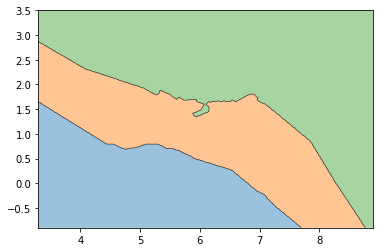

In [56]:
############################################################
# Decision boundary
# from mlxtend.plotting import plot_decision_regions
############################################################
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Plotting decision regions of two features
ft_names = iris.feature_names
two_feature_idx = [0,3]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

plot_decision_regions(X=X2, y=y2, clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('KNN3 on Iris')
plt.show()

TypeError: ignored

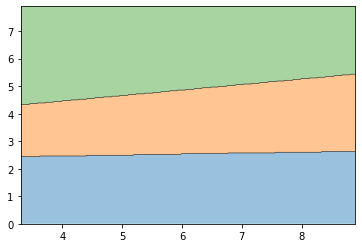

In [44]:
########################################################
# SVM
########################################################
# Training a classifier
from sklearn.svm import SVC

ft_names = iris.feature_names
two_feature_idx = [0,2]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=svm, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('SVM on Iris')
plt.show()
########################################################

#  Mnist data

In [57]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# str(digits)
# digits.data.shape
# digits.target.shape


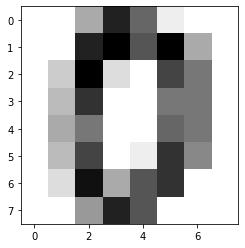

In [59]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [60]:
# digits.images.shape

n_samples = len(digits.images)
digits.images.shape

(1797, 8, 8)

0.9833333333333333
[2]


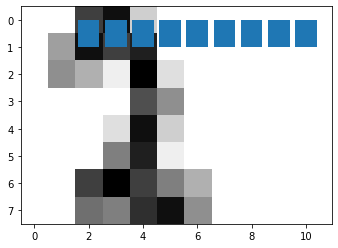

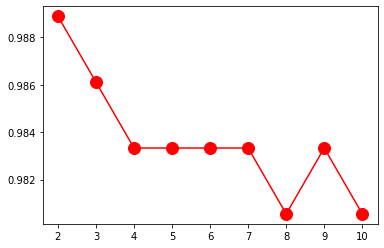

In [61]:
# Flattening (평탄화) : (8, 8) => (64,)
data = digits.images.reshape((n_samples, -1))

In [62]:
# data.shape

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.975


[3]


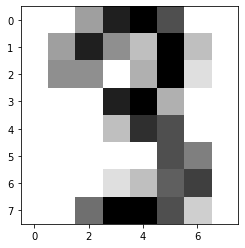

In [63]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

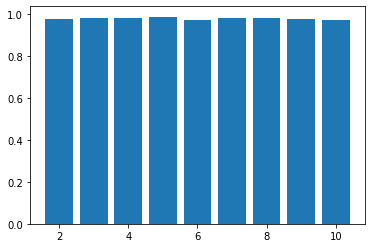

In [64]:
#####################################################
# DIY : Search the best hyperparameter: n_neighbors
#####################################################
scores = []
for kn in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=kn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)

scores

# Plot scores w.r.t. n_neighbors
plt.bar(range(2,11), scores)
# plt.ylim((0.95,1))
plt.show()

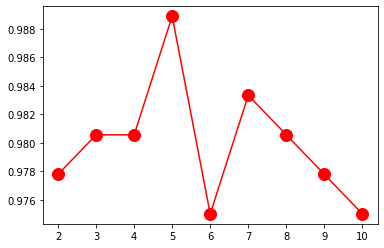

In [65]:
plt.plot(range(2,11), scores,'ro-', ms=12)
# plt.ylim((0.95,1))
plt.show()

    
    
    